# Module 6 Assignment: Predictive Model Exercise

Author: Han-Yi Lin  
Date: 11/6/2021

- The dataset contains 24,843 records  
- Description of the variables  
    - enrolldt: enrollment date
    - price: pay for a membership
    - downpmt: down payment
    - monthdue
    - pmttype: e.g. credit card, debit card, check, payment coupon book
    - use: frequency of usage of fitness facility
    - age
    - gender: 1 as female, 2 as male
    - default: 0 as non-churn, 1 as churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading Dataset

In [2]:
churn_data = pd.read_excel('C:/Users/Rita/Desktop/Fitness Club Data.xlsx')
churn_data.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,19970101,2178.85,250.00,6.0,4,1,0,2,0
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0
2,19970101,1107.67,125.00,5.0,1,0,0,2,0
3,19970102,950.44,237.61,9.0,5,0,0,1,0
4,19970103,1436.00,250.00,9.0,3,0,0,2,0


### Inspecting Data

In [3]:
# Showing data type
churn_data.dtypes

enrolldt      int64
price       float64
downpmt     float64
monthdue    float64
pmttype       int64
use           int64
age           int64
gender        int64
default       int64
dtype: object

In [4]:
# Checking all null values
churn_data.isnull().sum() # or churn_data.isnull().sum(axis=1)

enrolldt    0
price       0
downpmt     0
monthdue    0
pmttype     0
use         0
age         0
gender      0
default     0
dtype: int64

In [5]:
churn_data.shape

(24843, 9)

In [6]:
# Computing summary statistics on numerical features
num_col = ['price', 'downpmt', 'age']
churn_data[num_col].describe() 

,price,downpmt,age
count,24843.000000,24843.000000,24843.000000
mean,1003.658899,199.824535,29.203317
std,439.224768,335.437237,13.277721
min,0.000000,0.000000,0.000000
25%,699.000000,49.000000,22.000000
50%,999.000000,100.000000,28.000000
75%,1249.000000,175.000000,36.000000
max,9371.250000,9371.250000,99.000000


In [7]:
# frequency of use
churn_data['use'].value_counts()

0    9919
1    5776
6    2462
3    2385
4    1483
5    1125
7     792
2     618
8     283
Name: use, dtype: int64

### Exploratory Data Analysis

- matplotlib

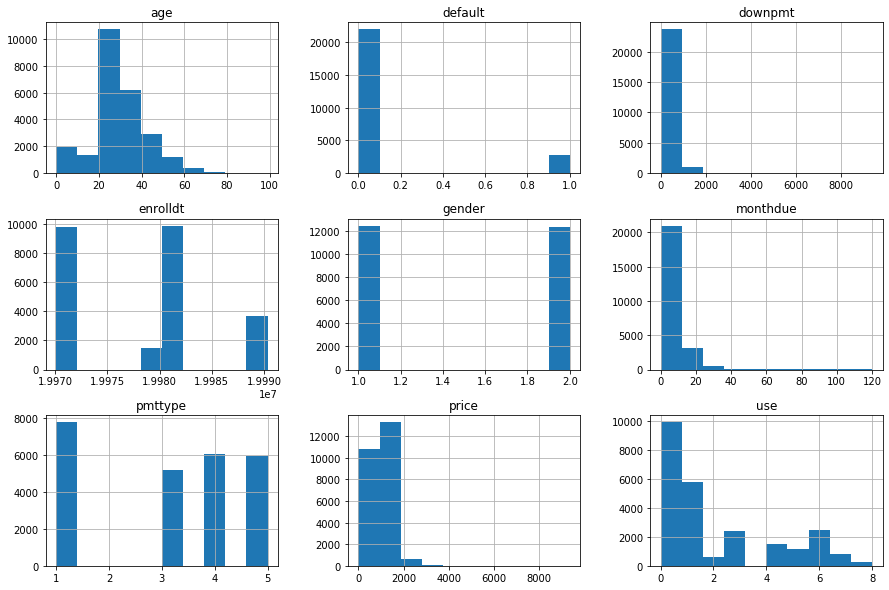

In [8]:
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
churn_data.hist(ax = ax)
pass

- seaborn

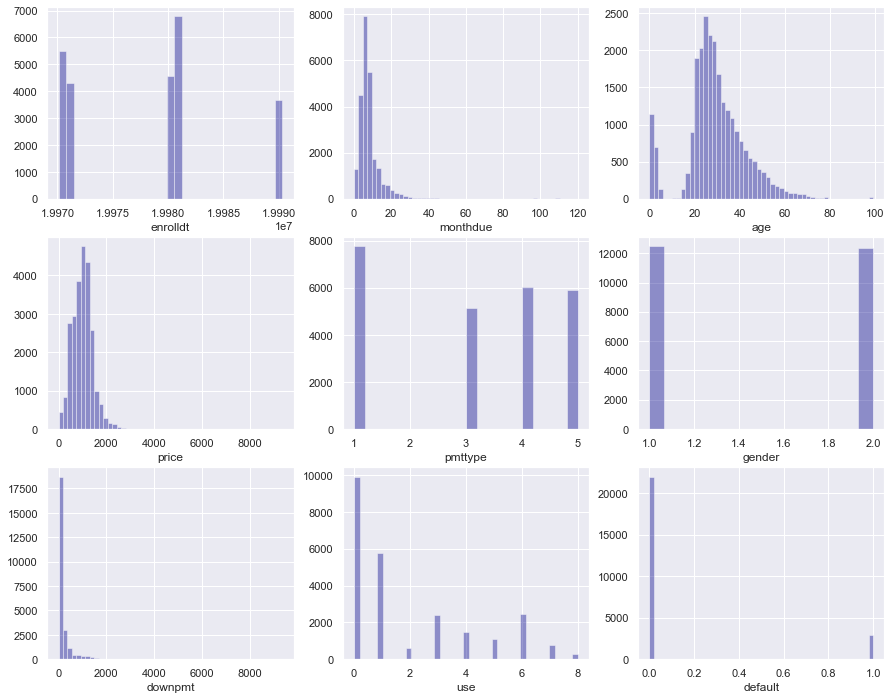

In [9]:
sns.set()
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, feature in enumerate(churn_data.columns):
    sns.distplot(churn_data[feature], color='darkblue', kde=False, ax=axes[i%3, i//3])   
plt.show()

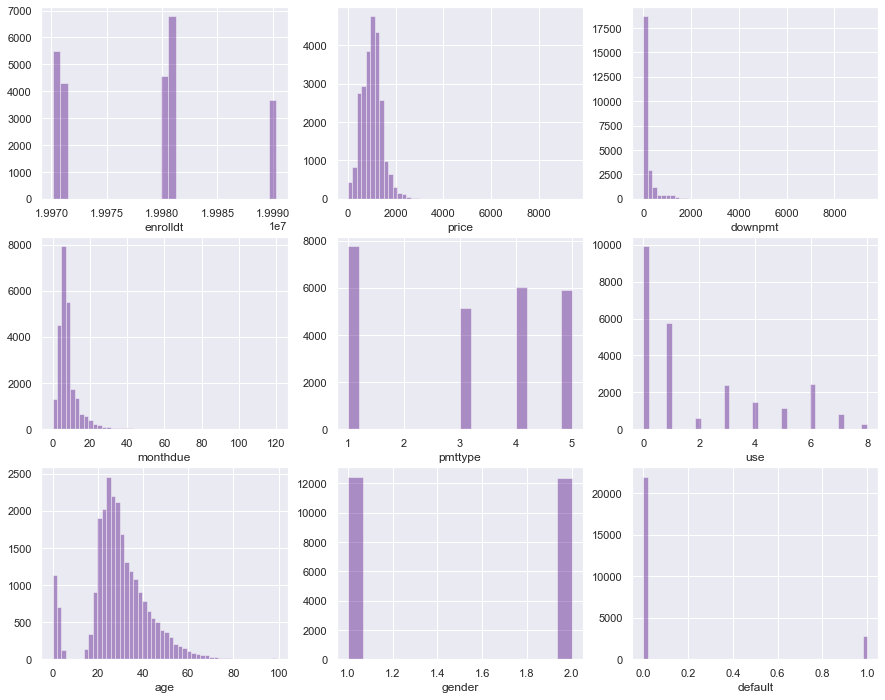

In [10]:
sns.set()
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
sns.distplot(churn_data['enrolldt'], color='indigo', kde=False, ax=axes[0, 0]) 
sns.distplot(churn_data['price'], color='indigo', kde=False, ax=axes[0, 1])
sns.distplot(churn_data['downpmt'], color='indigo', kde=False, ax=axes[0, 2]) 
sns.distplot(churn_data['monthdue'], color='indigo', kde=False, ax=axes[1, 0])
sns.distplot(churn_data['pmttype'], color='indigo', kde=False, ax=axes[1, 1]) 
sns.distplot(churn_data['use'], color='indigo', kde=False, ax=axes[1, 2])
sns.distplot(churn_data['age'], color='indigo', kde=False, ax=axes[2, 0]) 
sns.distplot(churn_data['gender'], color='indigo', kde=False, ax=axes[2, 1])
sns.distplot(churn_data['default'], color='indigo', kde=False, ax=axes[2, 2])
plt.show()

- Pairplot

<Figure size 2880x720 with 0 Axes>

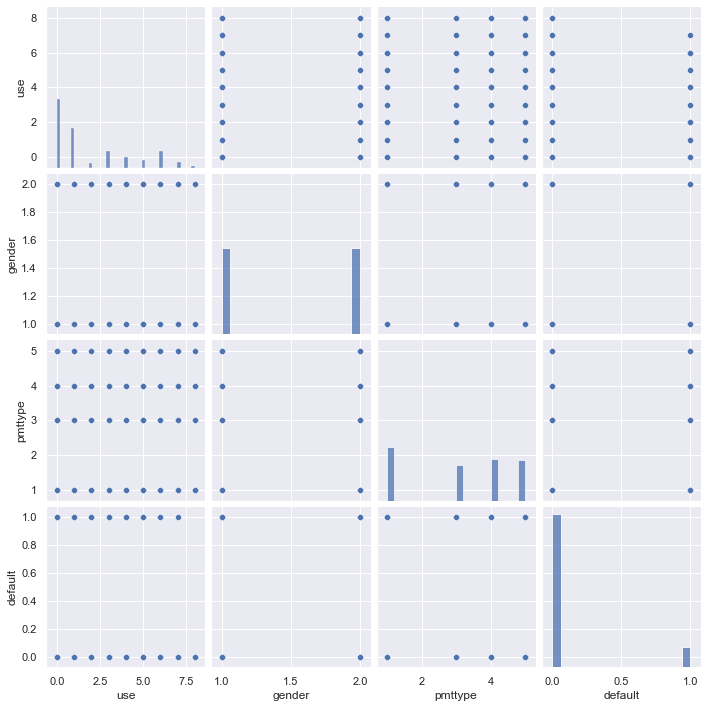

In [11]:
sns.set()
var = ['use', 'gender', 'pmttype', 'default']
plt.figure(figsize=(40,10))
sns.pairplot(data=churn_data[var])
plt.show()

- Payment type and Churn

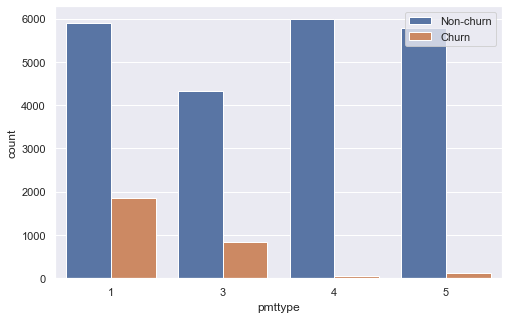

In [12]:
sns.set()
plt.figure(figsize=(8,5))
sns.countplot(x='pmttype', hue='default', data=churn_data)
plt.legend(labels=['Non-churn', 'Churn'])
plt.show()

- Correlation table

In [13]:
col = ['price', 'downpmt', 'age']
correlation = churn_data[col].corr()
correlation # default: Pearson

,price,downpmt,age
price,1.000000,0.277764,-0.097624
downpmt,0.277764,1.000000,0.000483
age,-0.097624,0.000483,1.000000


### Data Preprocessing

- Age

In [14]:
# Eliminate customers below 17 and above 79
churn_data = churn_data[churn_data['age'].between(17,79)] # default: inclusive=True
churn_data.shape

(22582, 9)

- Categorical variables

In [15]:
# Convert categorical variables into dummy variables
# pd.get_dummies()
# drop_first=True: get k-1 dummies out of k categorical levels, default False
# Dropping the first categorical variable is possible because if every other dummy column is 0, 
# then this means the first value would have been 1
churn_data = pd.get_dummies(churn_data, prefix=['pmttype', 'use'], columns=['pmttype', 'use'], drop_first=True)
churn_data.head()

,enrolldt,price,downpmt,monthdue,age,gender,default,pmttype_3,pmttype_4,pmttype_5,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8
2241,19970106,2175.00,400.00,5.50,17,2,0,1,0,0,0,0,0,0,0,0,0,0
2242,19970119,551.05,459.03,28.89,17,2,0,0,0,0,0,0,0,0,0,1,0,0
2243,19970127,1838.19,100.00,5.86,17,2,1,0,0,0,0,0,0,0,0,0,0,0
2244,19970130,2175.00,2175.00,6.00,17,1,0,0,0,0,0,0,0,0,0,0,0,0
2245,19970208,1464.44,1464.44,11.00,17,1,0,0,0,0,0,0,0,0,0,0,0,0


- Enrollment date

In [16]:
# Drop the enrollment date variable
churn_data = churn_data.drop(['enrolldt'], axis=1) # .drop(), axis=1 for columns

- Null values

In [17]:
# Checking missing values
churn_data.isnull().sum(axis=0) 

price        0
downpmt      0
monthdue     0
age          0
gender       0
default      0
pmttype_3    0
pmttype_4    0
pmttype_5    0
use_1        0
use_2        0
use_3        0
use_4        0
use_5        0
use_6        0
use_7        0
use_8        0
dtype: int64

### Logistic Regression Model

In [18]:
# Split data, creating two datafrmaes
y = churn_data['default']
X = churn_data.drop('default', axis=1) # drop columns(axis=1)

# Print y to double check
y.head()

2241    0
2242    0
2243    1
2244    0
2245    0
Name: default, dtype: int64

In [19]:
# Print X to double check
X.head()

,price,downpmt,monthdue,age,gender,pmttype_3,pmttype_4,pmttype_5,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8
2241,2175.00,400.00,5.50,17,2,1,0,0,0,0,0,0,0,0,0,0
2242,551.05,459.03,28.89,17,2,0,0,0,0,0,0,0,0,1,0,0
2243,1838.19,100.00,5.86,17,2,0,0,0,0,0,0,0,0,0,0,0
2244,2175.00,2175.00,6.00,17,1,0,0,0,0,0,0,0,0,0,0,0
2245,1464.44,1464.44,11.00,17,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Split X and y into training and testing sets
# 0.8 for training and 0.2 for testing one
# 42 is the most commonly used number
# stratify=y: the proportion of the values in the sample will be the same
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [21]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000) # the solver parameter is an optimizer

# Fit the model with data
logreg.fit(X_train, y_train) # .fit(X, y)

# Predict
y_pred = logreg.predict(X_test) # .predict(), predict class
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
# 0 as non-churn, 1 as churn
from collections import Counter
Counter(y_pred)

Counter({0: 4127, 1: 390})

### Performance Evaluation

- ***Confusion matrix***: false positives, false negatives, true positives and true negatives
- ***ROC curve***: focus on true positives vs. false positives
- ***Gains and lift chart***: focus on true positives

#### Confusion Matrix

In [23]:
# actual y
y_test

18351    0
6381     1
16348    0
10423    0
13644    0
        ..
3946     0
5097     0
12968    0
2717     0
22829    0
Name: default, Length: 4517, dtype: int64

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("The Confusion Matrix is \n \n", confusion_matrix(y_test, y_pred))

The Confusion Matrix is 
 
 [[3815  140]
 [ 312  250]]


In [25]:
# 250 = churn correctly (True Positive)
# 3815 = non-churn correctly (True Negative)

In [26]:
print("The Classification report is \n \n", classification_report(y_test, y_pred))

The Classification report is 
 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3955
           1       0.64      0.44      0.53       562

    accuracy                           0.90      4517
   macro avg       0.78      0.70      0.73      4517
weighted avg       0.89      0.90      0.89      4517



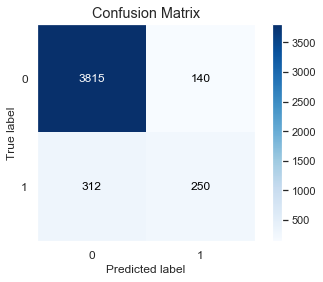

In [27]:
# scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

The diagonal elements represent the number of points for which the predicted label is equal to the true label.  
The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

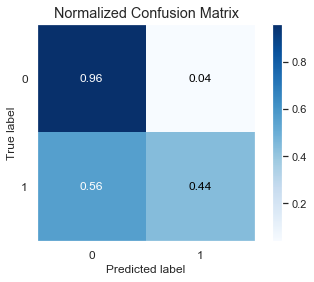

In [28]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True) # normalized
plt.show()

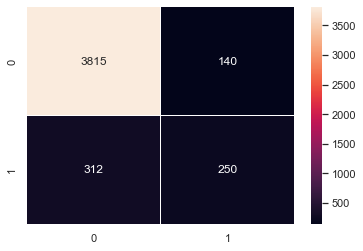

In [29]:
# seaborn
cm = np.array(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True, linewidths = 0.01, fmt='g') # fmt='g' to remove scientific notation
plt.show()

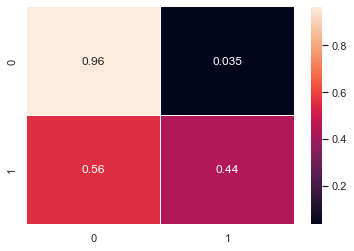

In [30]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # divide each row element by the sum of the entire row
sns.heatmap(cm_normalized, annot=True, linewidths = 0.01)
plt.show()

Why is there difference between a normalized and unnormalized confusion matrix? ***The difference arises due to an imbalance in classes.***  
Not all classes have the same number of total samples, and thus the unnormalized matrix outputs the absolute value, without considering how much proportion of the total class size is predicted correctly.

#### ROC Curve

Receiver Operating Characteristics curve

- plots true positive rate (tpr)(sensitivity) against false positive rate (fpr)(1 - specificity)
- look at how far away the model's curve gets from the line (random prediction)
- compare the performance of different models
- lift: the movement away from line
- Area Under Curve (AUC): area between curve and random prediction

In [31]:
from sklearn import metrics

In [32]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]

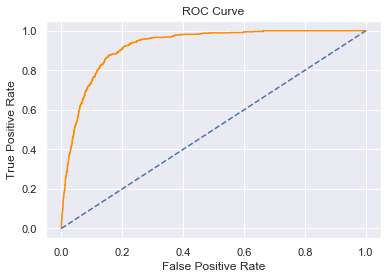

In [33]:
# matplotlib
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange') # x-axis: fpr, y-axis: tpr
plt.plot([0, 1], [0, 1], linestyle='--')# 45-degree diagonal
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

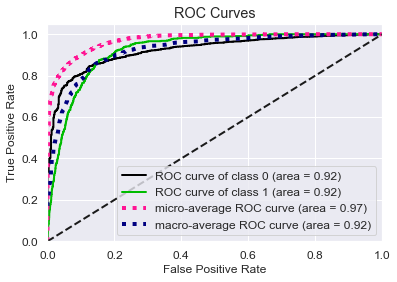

In [34]:
# scikit-plot
skplt.metrics.plot_roc(y_test, logreg.predict_proba(X_test))
plt.show()

In [35]:
# Compute the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.923515663311903

The ROC curve shows the tradeoff between all values of false positive rate and true positive rate.  
The closer the curve to the top-left corner, the better the performance.  
AUC score is 92%. (The higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.)  

#### Gains Chart

Gains chart is a common technique used in direct marketing where we select a small set of people to get a large number of responders.  
*Cumulative gains* and *lift charts* are a graphical representation of the advantage of using a predictive model to choose which customers to contact.

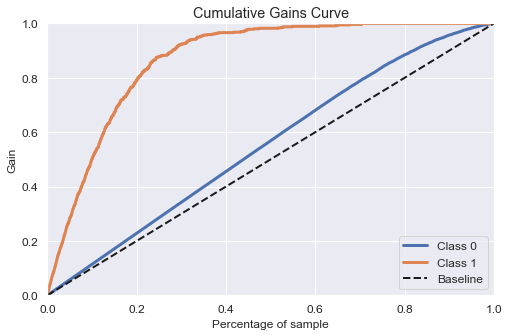

In [36]:
skplt.metrics.plot_cumulative_gain(y_test, logreg.predict_proba(X_test), figsize=(8,5))
plt.show()

x-axis: the percentage of customers contacted  
y-axis: the percentage of positive responses  
The 20% rate of the x-axis corresponds to the 20% highest probabilities.  
The top 20% of the leads ranked as most likely to respond to a marketing offer will contain about 80% of the actual responders. 

#### Lift Chart

The lift chart shows how much more likely we are to receive respondents than if we contact a random sample of customers.  
The lift chart is pretty much derived from the Gains chart.  

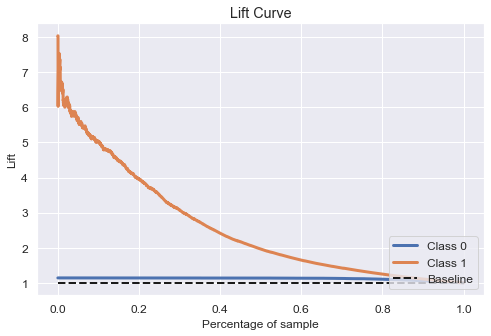

In [37]:
skplt.metrics.plot_lift_curve(y_test, logreg.predict_proba(X_test), figsize=(8,5))
plt.show()

A classifier that works really well will produce a high “lift” for the selection of a relatively small percentage of the ranked data.  
For example, by contacting only 10% of customers based on the predictive model, we will reach 5 times as many respondents as if we use no model.  
The curve gradually decreases as there are fewer and fewer records that are actually the class of interest to add, and there is less and less opportunity for the model to provide an advantage.

### Feature Selection

In [38]:
# Get the best coefficients
feature_imp = logreg.coef_
coef_table = pd.DataFrame({"feature_names":X_train.columns, "Beta":feature_imp[0], "AbsBeta":abs(feature_imp[0])})

# Get the sorted values
coef_table = coef_table.sort_values(by = 'AbsBeta', ascending = False)
print("The most important features in the model are: \n")
coef_table

The most important features in the model are: 



,feature_names,Beta,AbsBeta
13,use_6,-3.981162,3.981162
6,pmttype_4,-3.942743,3.942743
12,use_5,-3.070879,3.070879
11,use_4,-3.070165,3.070165
7,pmttype_5,-2.867185,2.867185
14,use_7,-2.547302,2.547302
10,use_3,-1.818831,1.818831
9,use_2,-1.641753,1.641753
15,use_8,-1.271544,1.271544
5,pmttype_3,-1.132715,1.132715


Payment type and usage are some of the significant variables. The unexpected outcome is the correlation of price and churn. It turns out that price does dot play a siginificant role in whether to leave the fitness club.

### Summary

The fitness center is constantly losing customers. The task is to build a logistic regression model to predict churn and learn which features are important to determine if a customer will churn.    

First, I started by loading and viewing the dataset. I see that the dataset has a mixture of both numerical and categorical features. I selected numerical features and calculated basic descriptive statistics such as mean, median, maximum, minimum value for each field. I then used histograms to visualize distributions of data elements. Next, I processed the dataset to ensure dataset usability and that the logistic regression model can make good predictions. There are some minor but essential data preprocessing tasks such as eliminating age group below 17, converting the categorical data into numeric. 

Afterwards, I split the dataset into train and test sets to prepare the data for two different phases of modeling, training and testing. I then fit a logistic regression model to the data and obtained the predictive result of churn numbers and non-churn numbers. Afterwards, I evaluated model accuracy using confusion matrix. The confusion matrix helped me view the model’s performance. There were about 3000 instances where the classification model predicted non-churn in which the actual value was non-churn. There were about 200 instances where the classification model predicted churn in which the actual value was churn. Additionally, from the classification table, the accuracy of the logistic regression classifier is 0.91, which shows that the model is quite robust.